In [1]:
import pandas as pd
import seaborn as sns
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

In [2]:
df = pd.read_csv("Kevin_Hillstrom_MineThatData_E-MailAnalytics_DataMiningChallenge.csv")
df

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend
0,10,2) $100 - $200,142.44,1,0,Surburban,0,Phone,Womens E-Mail,0,0,0.0
1,6,3) $200 - $350,329.08,1,1,Rural,1,Web,No E-Mail,0,0,0.0
2,7,2) $100 - $200,180.65,0,1,Surburban,1,Web,Womens E-Mail,0,0,0.0
3,9,5) $500 - $750,675.83,1,0,Rural,1,Web,Mens E-Mail,0,0,0.0
4,2,1) $0 - $100,45.34,1,0,Urban,0,Web,Womens E-Mail,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
63995,10,2) $100 - $200,105.54,1,0,Urban,0,Web,Mens E-Mail,0,0,0.0
63996,5,1) $0 - $100,38.91,0,1,Urban,1,Phone,Mens E-Mail,0,0,0.0
63997,6,1) $0 - $100,29.99,1,0,Urban,1,Phone,Mens E-Mail,0,0,0.0
63998,1,5) $500 - $750,552.94,1,0,Surburban,1,Multichannel,Womens E-Mail,0,0,0.0


Recency: Months since last purchase.  
History_Segment: Categorization of dollars spent in the past year.  
History: Actual dollar value spent in the past year.  
Mens: 1/0 indicator, 1 = customer purchased Mens merchandise in the past year.  
Womens: 1/0 indicator, 1 = customer purchased Womens merchandise in the past year.  
Zip_Code: Classifies zip code as Urban, Suburban, or Rural.  
Newbie: 1/0 indicator, 1 = New customer in the past twelve months.  
Channel: Describes the channels the customer purchased from in the past year.  

In [3]:
df.isnull().sum()

recency            0
history_segment    0
history            0
mens               0
womens             0
zip_code           0
newbie             0
channel            0
segment            0
visit              0
conversion         0
spend              0
dtype: int64

In [6]:
 df["segment"].unique()

array(['Womens E-Mail', 'No E-Mail', 'Mens E-Mail'], dtype=object)

No E-Mail

In [13]:
test_noemail = df[ df["segment"] == "No E-Mail" ].conversion

In [18]:
test_womensemail = df[ df["segment"] == "Womens E-Mail" ].conversion

In [19]:
test_mensemail = df[ df["segment"] ==  "Mens E-Mail" ].conversion

In [20]:
test = [test_noemail, test_womensemail, test_mensemail]

In [21]:
from scipy import stats 
test_result = stats.ttest_ind(test_noemail, test_womensemail)
print(test_result)

Ttest_indResult(statistic=-3.7801048931020027, pvalue=0.00015697549611934003)


In [26]:
test_result = stats.ttest_ind(test_womensemail , test_mensemail )
print(test_result)

Ttest_indResult(statistic=-3.713096658044688, pvalue=0.00020499896855672445)


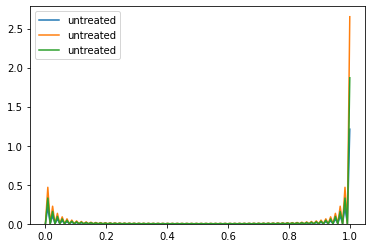

In [28]:
sns.kdeplot(test_noemail , label="untreated")
sns.kdeplot(test_mensemail , label="untreated")
sns.kdeplot(test_womensemail , label="untreated")

In [25]:
test_result = stats.ttest_ind(test_noemail, test_womensemail , test_mensemail )
print(test_result)

TypeError: tuple indices must be integers or slices, not Series

In [18]:
df_mens_email.sample(frac=0.5)

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend
20667,3,5) $500 - $750,719.16,1,0,Surburban,1,Phone,Mens E-Mail,0,0,0.00
21405,2,3) $200 - $350,298.84,0,1,Urban,1,Web,Mens E-Mail,0,0,0.00
48355,9,2) $100 - $200,132.17,1,0,Surburban,1,Web,Mens E-Mail,1,0,0.00
16075,7,5) $500 - $750,729.84,0,1,Surburban,1,Phone,Mens E-Mail,1,0,0.00
34920,1,2) $100 - $200,175.43,1,0,Urban,0,Phone,Mens E-Mail,0,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
22040,9,5) $500 - $750,618.20,1,1,Surburban,1,Multichannel,Mens E-Mail,1,1,73.82
20427,10,1) $0 - $100,49.75,0,1,Urban,1,Web,Mens E-Mail,0,0,0.00
42180,4,2) $100 - $200,174.99,0,1,Urban,0,Web,Mens E-Mail,0,0,0.00
59144,3,5) $500 - $750,650.72,0,1,Surburban,1,Multichannel,Mens E-Mail,0,0,0.00


In [20]:
df_mens_email.history_segment.unique()

array(['5) $500 - $750', '2) $100 - $200', '1) $0 - $100',
       '3) $200 - $350', '6) $750 - $1,000', '4) $350 - $500',
       '7) $1,000 +'], dtype=object)

In [32]:
df[ df["segment"] == "Womens E-Mail" ].conversion.values

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [30]:
from causalinference import CausalModel

In [40]:
cm = CausalModel(
    Y = df[ df["segment"] == "Womens E-Mail" ].conversion.values,
    X = df[ df["segment"] == "Womens E-Mail" ].womens.values,
    D = df[ df["segment"] == "Womens E-Mail" ].newbie.values
)
cm.est_via_matching()

print(cm.estimates)

RecursionError: maximum recursion depth exceeded while calling a Python object

In [41]:
print(cm.summary_stats)


Summary Statistics

                     Controls (N_c=10624)       Treated (N_t=10763)             
       Variable         Mean         S.d.         Mean         S.d.     Raw-diff
--------------------------------------------------------------------------------
              Y        0.009        0.093        0.009        0.095        0.000

                     Controls (N_c=10624)       Treated (N_t=10763)             
       Variable         Mean         S.d.         Mean         S.d.     Nor-diff
--------------------------------------------------------------------------------
             X0        0.538        0.499        0.562        0.496        0.046

